In [9]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegressionCV

import sys
sys.path.append('../../')
from src.skmatter.decomposition.pcovc_new import PCovC

plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['scatter.edgecolors'] = "k"

random_state = 0
n_components = 2

In [10]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(y.shape)

(150,)


In [11]:
# bcancer = datasets.load_breast_cancer()
# X, y = bcancer.data, bcancer.target

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.linear_model import LogisticRegression


model_ss = PCovC(classifier=LogisticRegression(), n_components=2, mixing=0.1, tol=1e-12, space="sample")
model_fs = PCovC(classifier=LogisticRegression(), n_components=2, mixing=0.1, tol=1e-12, space="feature")
np.set_printoptions(threshold=sys.maxsize)

model_ss.fit(X_scaled, y)
model_fs.fit(X_scaled, y)

X_ss = model_ss.transform(X_scaled)
X_fs = model_fs.transform(X_scaled)

r_ss = model_ss.inverse_transform(X_ss)
r_fs = model_fs.inverse_transform(X_fs)

# print(r_ss)
# print(r_fs)
print(r_ss-r_fs)

np.allclose(r_ss, r_fs, 1e-5)



[[-1.49768165e-03 -1.45681752e-03  2.58614669e-03  4.31067686e-03]
 [ 4.14806128e-03  5.25236934e-01  7.25605017e-02  2.29927969e-01]
 [-4.84451946e-03  8.16132769e-02  8.84397113e-03  3.47093780e-02]
 [-5.64336834e-03  1.09953646e-01  1.11794372e-02  4.52176203e-02]
 [-6.10347385e-03 -2.29383789e-01 -3.01761719e-02 -9.60356831e-02]
 [-7.43607594e-03 -5.33522041e-01 -6.91264306e-02 -2.25046756e-01]
 [-1.39125070e-02 -3.97211730e-01 -5.96215634e-02 -1.75844598e-01]
 [-2.07752685e-03  3.91138376e-02  6.72971933e-03  2.02930483e-02]
 [-6.14604775e-03  2.27785815e-01  2.48909021e-02  9.36047506e-02]
 [ 3.92729857e-03  4.70946484e-01  6.59335069e-02  2.07384466e-01]
 [ 1.48831464e-03 -3.17259708e-02  2.28000144e-03 -4.63152374e-03]
 [-7.26316426e-03 -1.48242479e-01 -2.18890266e-02 -6.40709403e-02]
 [ 3.78546070e-03  5.35977711e-01  7.36932926e-02  2.34315096e-01]
 [-7.97411266e-03  1.34853493e-01  1.20910139e-02  5.35128348e-02]
 [ 5.71116712e-03 -6.58749209e-02  3.25460320e-03 -1.31337083e

False

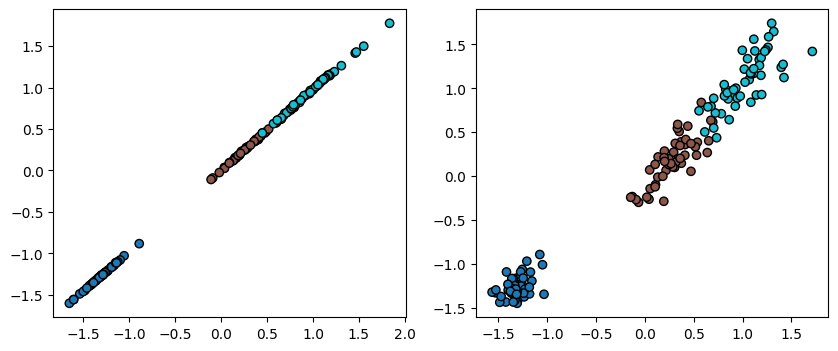

In [13]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 4))
axis1.scatter(r_ss[:, 2], r_ss[:, 3], c=y)
axis2.scatter(r_fs[:, 2], r_fs[:, 3], c=y)

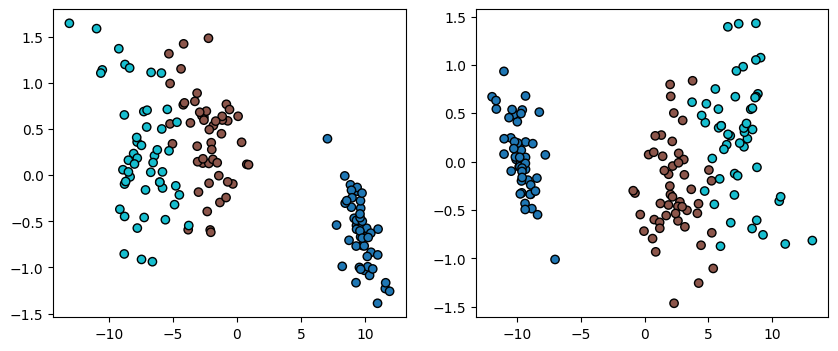

In [14]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 4))
axis1.scatter(X_ss[:, 0], X_ss[:, 1], c=y)
axis2.scatter(X_fs[:, 0], X_fs[:, 1], c=y)

0.98
0.98
[-59.2618619   13.07557218  46.18628972]
(150, 3)


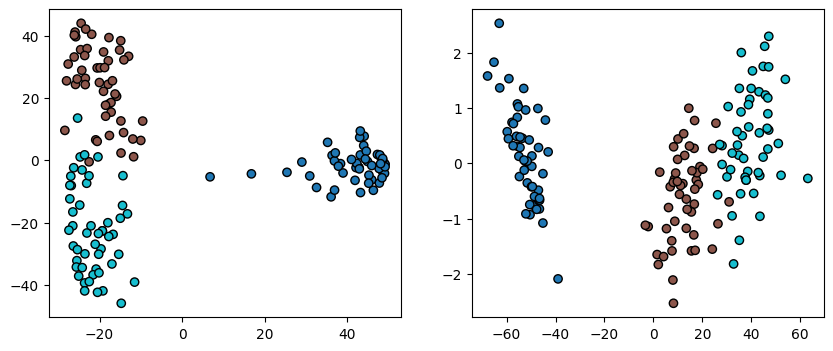

In [27]:
from sklearn.calibration import LinearSVC
from sklearn.linear_model import Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC
from src.skmatter.decomposition.kernel_pcovc_new import KernelPCovC
from sklearn.metrics import accuracy_score

classifier = Perceptron()
model = KernelPCovC(mixing=0.5, kernel="rbf", classifier=classifier, n_components=2)
model.fit(X_scaled, y)
T = model.transform(X_scaled)
y_pred = model.predict(X_scaled)
print(accuracy_score(y, y_pred))

model2 = PCovC(mixing=0.5, classifier=LinearDiscriminantAnalysis(), n_components=2)
model2.fit(X_scaled, y)
T_2 = model2.transform(X_scaled)
y_pred_2 = model2.predict(X_scaled)
print(accuracy_score(y, y_pred_2))
print(model2.decision_function(X_scaled)[100])
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10,4))
axis1.scatter(T[:, 0], T[:, 1], c=y)
axis2.scatter(T_2[:, 0], T_2[:, 1], c=y)
# DecisionBoundaryDisplay.from_estimator(
#           estimator=model.classifier_, 
#           X=T, 
#           ax=axis1, 
#           #eps=1,
#           response_method="predict", 
#      )

svc = SVC()
svc.fit(X_scaled, y)
print(svc.decision_function(X_scaled).shape)

(150, 2)


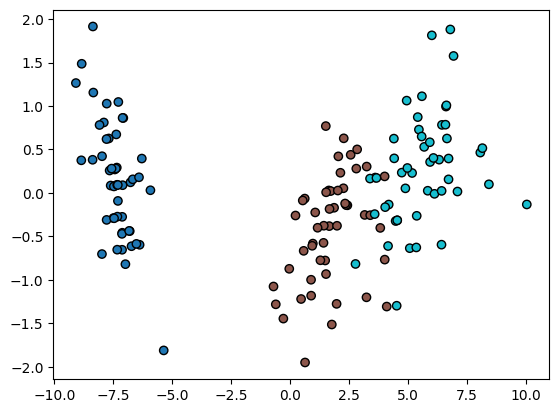

In [16]:
classifier = LogisticRegression()
classifier.fit(X_scaled, y)
Yhat = classifier.predict(X_scaled)
W = classifier.coef_.reshape(X_scaled.shape[1], -1)

pcovc1 = PCovC(mixing=0.5, classifier=classifier, n_components=2)
pcovc1.fit(X_scaled, Yhat, W)
T = pcovc1.transform(X_scaled)
print(T.shape)
fig, axis = plt.subplots()
axis.scatter(T[:, 0], T[:, 1], c=y)

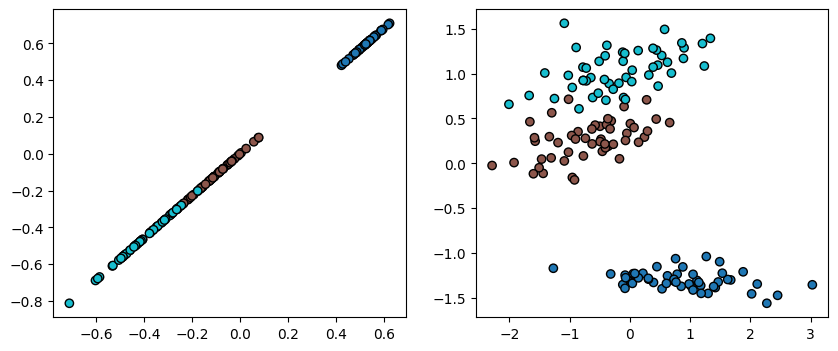

In [17]:
rT = model.inverse_transform(T)
rT2 = model2.inverse_transform(T_2)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10,4))
axis1.scatter(rT[:, 1], rT[:, 2], c=y)
axis2.scatter(rT2[:, 1], rT2[:, 2], c=y)